In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


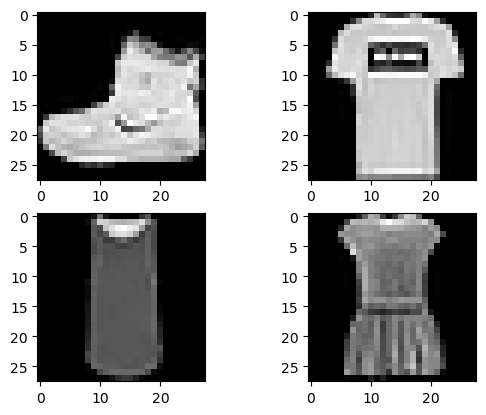

In [23]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Reshape [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

print(X_train.shape)
print(X_test.shape)

## normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3].reshape(28,28), cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [17]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [80]:
#Build Model A


model_a=Sequential() #layer for model to extract image

model_a.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.25))
model_a.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.25))

#flatten convert image to embedding
model_a.add(Flatten())

#hidden layer
model_a.add(Dense(128, activation='relu')) #hidden layer with 128 neurons
model_a.add(Dropout(0.5))
model_a.add(Dense(num_classes, activation='softmax'))

# Compile model
model_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3) Early stopping for A
early_stop_a = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

# Fit the model, validaiton split will split from training data to test performance of model
baseline_a = model_a.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=256, callbacks=[early_stop_a])

# Get the best epoch where validation loss was minimized
best_epoch_a = early_stop_a.stopped_epoch + 1
print(f"\nTraining stopped at epoch: {best_epoch_a}")


C:\Users\sandy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 193ms/step - accuracy: 0.5962 - loss: 1.3305 - val_accuracy: 0.3192 - val_loss: 2.6053
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.8046 - loss: 0.5359 - val_accuracy: 0.6202 - val_loss: 1.3649
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.8323 - loss: 0.4583 - val_accuracy: 0.8298 - val_loss: 0.4793
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.8521 - loss: 0.4027 - val_accuracy: 0.8712 - val_loss: 0.3501
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.8616 - loss: 0.3774 - val_accuracy: 0.8877 - val_loss: 0.3051
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 44s 217ms/step - accuracy: 0.8697 - loss: 0.3592 - val_accuracy: 0.8926 - val_loss: 0.2916
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 209ms/step - accuracy: 0.8774 - loss: 0.3380 - val_accuracy: 0.8973 - val_loss: 0.2831
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 295ms/step - accuracy: 0.8796 - loss: 0

In [82]:
#Build Model B

model_b=Sequential()
model_b.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.25))

model_b.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.25))

model_b.add(Flatten())
model_b.add(Dense(128, activation='relu'))
model_b.add(Dropout(0.5))
model_b.add(Dense(num_classes, activation='softmax'))

# Compile model
model_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3) Early stopping for B
early_stop_b = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

# Fit the model
baseline_b = model_b.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=256, callbacks=[early_stop_b])

# Get the best epoch where validation loss was minimized
best_epoch_b = early_stop_b.stopped_epoch + 1
print(f"\nTraining stopped at epoch: {best_epoch_b}")



Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 61s 298ms/step - accuracy: 0.6702 - loss: 1.0851 - val_accuracy: 0.1032 - val_loss: 6.6127
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 57s 304ms/step - accuracy: 0.8278 - loss: 0.4700 - val_accuracy: 0.3899 - val_loss: 3.1968
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 314ms/step - accuracy: 0.8560 - loss: 0.3999 - val_accuracy: 0.8269 - val_loss: 0.5944
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 62s 332ms/step - accuracy: 0.8683 - loss: 0.3560 - val_accuracy: 0.8907 - val_loss: 0.3162
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 58s 310ms/step - accuracy: 0.8740 - loss: 0.3369 - val_accuracy: 0.8907 - val_loss: 0.3020
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 295ms/step - accuracy: 0.8837 - loss: 0.3173 - val_accuracy: 0.8813 - val_loss: 0.3367
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 62s 332ms/step - accuracy: 0.8881 - loss: 0.3055 - val_accuracy: 0.9034 - val_loss: 0.2662
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 318ms/step - accuracy: 0.8964 - loss: 0

In [84]:
#Build Model C

model_c=Sequential()
model_c.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_c.add(BatchNormalization())
model_c.add(MaxPooling2D(pool_size=(2, 2)))
model_c.add(Dropout(0.25))

model_c.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_c.add(BatchNormalization())
model_c.add(MaxPooling2D(pool_size=(2, 2)))
model_c.add(Dropout(0.25))


model_c.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_c.add(BatchNormalization())
model_c.add(MaxPooling2D(pool_size=(2, 2)))
model_c.add(Dropout(0.25))

model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(num_classes, activation='softmax'))

# Compile model
model_c.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3) Early stopping for C
early_stop_c = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

# Fit the model
baseline_c = model_c.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=256, callbacks=[early_stop_c])

# Get the best epoch where validation loss was minimized
best_epoch_c = early_stop_c.stopped_epoch + 1
print(f"\nTraining stopped at epoch: {best_epoch_c}")




Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.5562 - loss: 1.4135 - val_accuracy: 0.0958 - val_loss: 2.4252
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.7814 - loss: 0.6158 - val_accuracy: 0.5869 - val_loss: 1.2259
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.8155 - loss: 0.5159 - val_accuracy: 0.8335 - val_loss: 0.4684
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 165ms/step - accuracy: 0.8317 - loss: 0.4676 - val_accuracy: 0.8584 - val_loss: 0.3780
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 166ms/step - accuracy: 0.8419 - loss: 0.4381 - val_accuracy: 0.8687 - val_loss: 0.3528
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 172ms/step - accuracy: 0.8539 - loss: 0.4042 - val_accuracy: 0.8744 - val_loss: 0.3369
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 174ms/step - accuracy: 0.8584 - loss: 0.3989 - val_accuracy: 0.8817 - val_loss: 0.3181
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 173ms/step - accuracy: 0.8640 - loss: 0

In [86]:
# Evaluate the model A on the validation set
val_acc_a = max(baseline_a.history['val_accuracy'])
val_loss_a =min(baseline_a.history['val_loss'])

# Evaluate the model B on the validation set
val_acc_b = max(baseline_b.history['val_accuracy'])
val_loss_b =min(baseline_b.history['val_loss'])

# Evaluate the model on the validation set
val_acc_c = max(baseline_c.history['val_accuracy'])
val_loss_c =min(baseline_c.history['val_loss'])


print(f"Model A: Best Validation Accuracy: {val_acc_a * 100:.2f}%")
print(f"Model A: Lowest Validation Loss: {val_loss_a:.4f}")
print(f"Model B Best Validation Accuracy: {val_acc_b * 100:.2f}%")
print(f"Model B Lowest Validation Loss: {val_loss_b:.4f}")
print(f"Model C Best Validation Accuracy: {val_acc_c * 100:.2f}%")
print(f"Model C Lowest Validation Loss: {val_loss_c:.4f}")



Model A: Best Validation Accuracy: 90.88%
Model A: Lowest Validation Loss: 0.2489
Model B Best Validation Accuracy: 90.34%
Model B Lowest Validation Loss: 0.2662
Model C Best Validation Accuracy: 89.72%
Model C Lowest Validation Loss: 0.2730


In [ ]:
#model A shows the best results

In [39]:
batch_sizes = [32, 64, 128, 256]
best_batch_size = None
best_val_acc = 0
best_model=model_a

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    
    best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    baseline = best_model.fit(X_train, y_train, validation_split=0.2, epochs=16, batch_size=batch_size)
    
    # Evaluate on validation set
    val_acc=max(baseline.history['val_accuracy'])
    val_loss=max(baseline.history['val_loss'])
    print(f"Batch size {batch_size} → Validation Accuracy: {val_acc * 100:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_batch_size = batch_size

print(f"Best batch size: {best_batch_size} with validation accuracy: {best_val_acc*100:.2f}%")


Training with batch size: 32
Epoch 1/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 30ms/step - accuracy: 0.8794 - loss: 0.3354 - val_accuracy: 0.8735 - val_loss: 0.3240
Epoch 2/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8782 - loss: 0.3254 - val_accuracy: 0.9024 - val_loss: 0.2717
Epoch 3/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.8872 - loss: 0.3093 - val_accuracy: 0.9037 - val_loss: 0.2722
Epoch 4/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8894 - loss: 0.3039 - val_accuracy: 0.8929 - val_loss: 0.2821
Epoch 5/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.8948 - loss: 0.2886 - val_accuracy: 0.8967 - val_loss: 0.2759
Epoch 6/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.8905 - loss: 0.2898 - val_accuracy: 0.8975 - val_loss: 0.2831
Epoch 7/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8986 - loss: 0.2757 - val_accuracy: 0.8951 - val_loss: 0.2849
Epoch 8/16
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 3

In [94]:
#since model a has the best results.

#Build Model A and add in additional dense layer


model_best=Sequential() #layer for model to extract image

model_best.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2, 2)))
model_best.add(Dropout(0.25))
model_best.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model_best.add(BatchNormalization())
model_best.add(MaxPooling2D(pool_size=(2, 2)))
model_best.add(Dropout(0.25))

#flatten convert image to embedding
model_best.add(Flatten())

#hidden layer
model_best.add(Dense(128, activation='relu')) #hidden layer with 128 neurons
model_best.add(Dropout(0.5))
model_best.add(Dense(256, activation='relu'))
model_best.add(Dropout(0.5))
model_best.add(Dense(num_classes, activation='softmax'))

# Compile model
model_best.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3) Early stopping for best
early_stop_best = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

# Fit the model, validaiton split will split from training data to test performance of model
best_baseline = model_best.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=256, callbacks=[early_stop_best])

# Get the best epoch where validation loss was minimized
best_epoch = early_stop_best.stopped_epoch + 1
print(f"\nTraining stopped at epoch: {best_epoch}")


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 174ms/step - accuracy: 0.5203 - loss: 1.4443 - val_accuracy: 0.3902 - val_loss: 1.8203
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 183ms/step - accuracy: 0.7769 - loss: 0.6116 - val_accuracy: 0.6467 - val_loss: 1.0352
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.8164 - loss: 0.5025 - val_accuracy: 0.8325 - val_loss: 0.4634
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.8406 - loss: 0.4395 - val_accuracy: 0.8681 - val_loss: 0.3543
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.8510 - loss: 0.4115 - val_accuracy: 0.8787 - val_loss: 0.3335
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 221ms/step - accuracy: 0.8634 - loss: 0.3810 - val_accuracy: 0.8874 - val_loss: 0.3124
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.8645 - loss: 0.3751 - val_accuracy: 0.8888 - val_loss: 0.3015
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.8693 - loss: 0

In [132]:
# Evaluate the model A on the validation set
val_acc = max(best_baseline.history['val_accuracy'])
val_loss =min(best_baseline.history['val_loss'])

print(f"Model Best: Best Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Model Best: Lowest Validation Loss: {val_loss:.4f}")

Model Best: Best Validation Accuracy: 91.06%
Model Best: Lowest Validation Loss: 0.2558


In [134]:
print(f"Model A: Best Validation Accuracy: {val_acc_a * 100:.2f}%")
print(f"Model A: Lowest Validation Loss: {val_loss_a:.4f}")

Model A: Best Validation Accuracy: 90.88%
Model A: Lowest Validation Loss: 0.2489


6. Final Evaluation on the Test Dataset
Once selected the best model and the best batch size, evaluate the final model on the test dataset and print the classification report for detailed metrics like precision, recall, and F1-score.

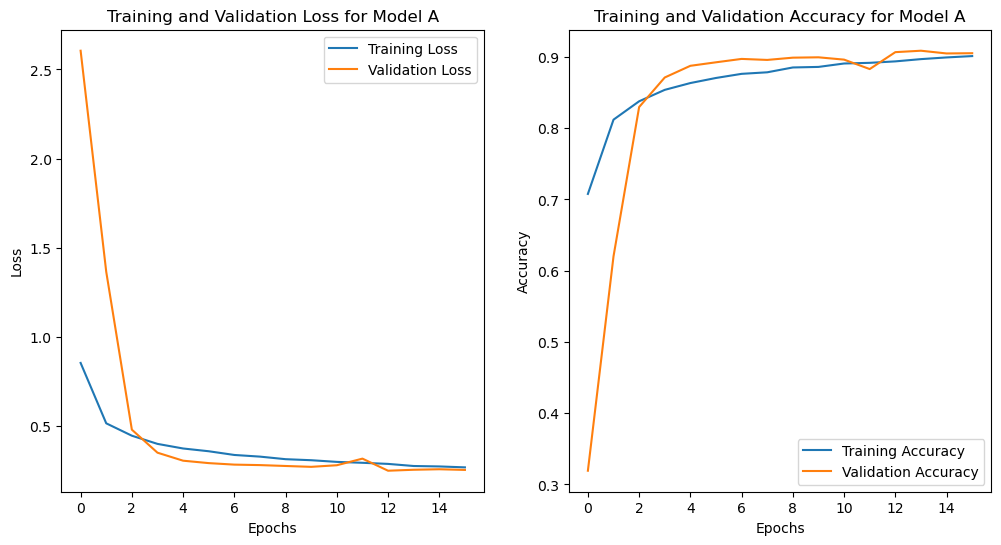

In [120]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(baseline_a.history['loss'], label='Training Loss')
plt.plot(baseline_a.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Model A')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(baseline_a.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_a.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model A')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


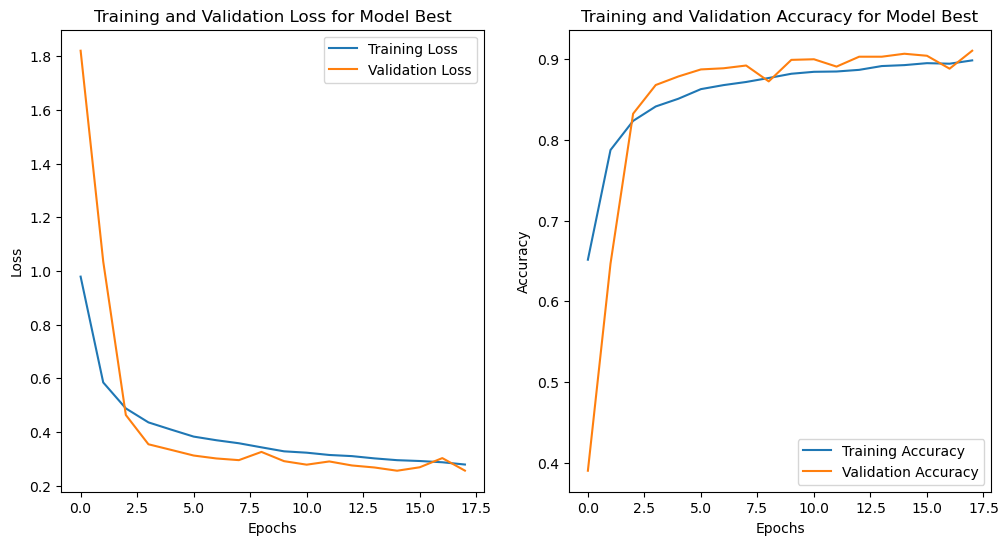

In [122]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(best_baseline.history['loss'], label='Training Loss')
plt.plot(best_baseline.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Model Best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(best_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(best_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model Best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [124]:
# Predict classes for test set
y_pred_a = model_a.predict(X_test)

# Convert predictions and true labels from one-hot encoding to class labels
y_pred_classes_a = np.argmax(y_pred_a, axis=1)
y_true_classes_a = np.argmax(y_test, axis=1)

# Generate classification report
report_a = classification_report(y_true_classes_a, y_pred_classes_a)
print("Classification Report for Model A:\n", report_a)
display(confusion_matrix(y_true_classes_a, y_pred_classes_a))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Classification Report for Model A:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.85      0.86      1000
           3       0.89      0.92      0.90      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.69      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



array([[888,   0,  15,  14,   3,   2,  76,   0,   2,   0],
       [  1, 980,   0,  15,   2,   0,   1,   0,   1,   0],
       [ 19,   0, 848,  11,  56,   0,  66,   0,   0,   0],
       [ 18,   6,  10, 919,  18,   1,  27,   0,   1,   0],
       [  0,   1,  35,  42, 846,   0,  75,   0,   1,   0],
       [  0,   0,   0,   0,   0, 968,   0,  23,   0,   9],
       [148,   1,  67,  27,  62,   0, 689,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 962,   0,  31],
       [  3,   0,   2,   6,   3,   2,  10,   2, 970,   2],
       [  0,   0,   0,   0,   0,   4,   1,  26,   0, 969]], dtype=int64)

In [128]:
# Predict classes for test set
y_pred_best = model_best.predict(X_test)

# Convert predictions and true labels from one-hot encoding to class labels
y_pred_classes_best = np.argmax(y_pred_best, axis=1)
y_true_classes_best = np.argmax(y_test, axis=1)

# Generate classification report
report_best = classification_report(y_true_classes_best, y_pred_classes_best)
print("Classification Report for Best Model:\n", report_best)
display(confusion_matrix(y_true_classes_best, y_pred_classes_best))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.86      0.95      0.91      1000
           4       0.86      0.82      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.69      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



array([[864,   1,  19,  29,   4,   1,  79,   0,   3,   0],
       [  0, 974,   0,  19,   4,   0,   1,   0,   2,   0],
       [ 11,   0, 863,  13,  47,   0,  65,   0,   1,   0],
       [  8,   0,   6, 950,  13,   0,  23,   0,   0,   0],
       [  1,   0,  39,  47, 823,   0,  90,   0,   0,   0],
       [  0,   0,   0,   0,   0, 970,   0,  23,   0,   7],
       [131,   0,  69,  37,  66,   0, 690,   0,   7,   0],
       [  0,   0,   0,   0,   0,   4,   0, 977,   0,  19],
       [  0,   1,   5,   4,   2,   2,   5,   4, 976,   1],
       [  1,   0,   0,   0,   0,   5,   0,  36,   0, 958]], dtype=int64)

In [130]:
# Final evaluation of the model
scores_a = model_a.evaluate(X_test, y_test, verbose=0)
scores_best = model_best.evaluate(X_test, y_test, verbose=0)

# Calculate CNN Error
cnn_error_a = 100 - scores_a[1] * 100
cnn_error_best=100-scores_best[1]*100
print("CNN Error for Model A: %.2f%%" % cnn_error_a)
print("CNN Error for Model best: %.2f%%" % cnn_error_best)

# Calculate Test Accuracy
test_accuracy_a = scores_a[1] * 100
test_accuracy_best = scores_best[1] * 100
print(f"Test Accuracy for Model A: {test_accuracy_a:.2f}%")
print(f"Test Accuracy for Model Best: {test_accuracy_best:.2f}%")


CNN Error for Model A: 9.61%
CNN Error for Model best: 9.55%
Test Accuracy for Model A: 90.39%
Test Accuracy for Model Best: 90.45%


In [66]:
model_best.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,808 (2.96 MB)

 Trainable params: 258,538 (1009.91 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 517,078 (1.97 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


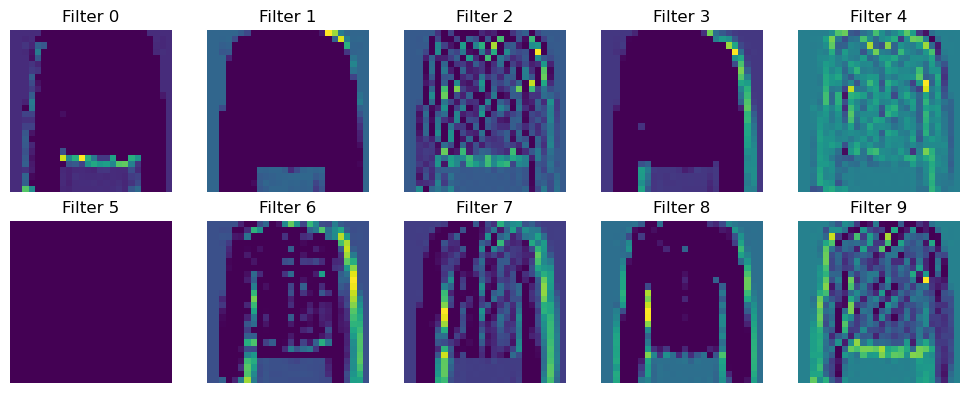

In [70]:
sample_image = X_test[10].reshape(1, 28, 28, 1)

model_input = model_best.get_layer(index=0).input  # To get the reference to the input layer of our Sequential model

# Create a model that outputs activations from the last Conv2D layer
layer_name = 'conv2d_15'  # You can check the exact name with model.summary()
# layer_name = 'max_pooling2d_6'

# Here we define a model that is a subset of our original model, defined by the layers from
# input layer to the layer that we specify.
intermediate_layer_model = Model(model_input,
                                 model_best.get_layer(layer_name).output)

# Get feature maps
feature_maps = intermediate_layer_model.predict(sample_image)
# print(feature_maps)

# Plot feature maps from that layer
plt.figure(figsize=(10, 4))  # This controls the output image size (width x height)
for i in range(10):  # How many feature maps we want to show
    ax = plt.subplot(2, 5, i + 1)  # This makes a 2x5 image set
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Filter {i}')
plt.tight_layout()
plt.show()